# I. Очистка и подготовка данных

**Цель:** очистить данные, обработать пропуски, избавиться от выбросов, преобразовать типы данных, проверить бизнес-логику, добавить новые признаки и подготовить датасет к исследовательскому анализу.

---
## 1. Импорт библиотек и загрузка данных
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_theme(style="darkgrid", palette="deep")

In [2]:
path = "../data/raw/kicksharing.csv"
df = pd.read_csv(path)

# Отобразим первые и последние 5 строк, чтобы убедиться в том, что данные загрузились
display(df.head())
display(df.tail())

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
396744,349109813,755778419,M,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,E,1.555069,2024-09-25 11:39:42.000000,2024-09-25 11:39:46.885000,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,NaN
396745,348829245,1146263947,M,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.0,300.0,Max,2.270902,2024-09-24 20:05:43.000000,2024-09-24 20:05:46.954000,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,NaN
396746,273529251,1012601147,M,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.0,300.0,E,1.411171,2024-09-03 16:07:43.000000,2024-09-03 16:07:45.311487,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,NaN
396747,306062051,863877659,M,19,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,1.002400,2024-09-12 18:28:48.000000,2024-09-12 18:28:50.401000,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,NaN
396748,262579355,897372192,M,33,GRD,UNM,Г МОСКВА,8.08,50.0,300.0,SL,0.914210,2024-07-25 07:44:07.000000,2024-07-25 07:44:10.998103,2024-07-25 07:50:54.825261,3,2024-07-25 07:44:10.998103,106.56,15.66,NaN


Данные по поездкам на самокатах загружены. Файл содержит информацию о клиентах, поездках, стоимости, регионах и характеристиках самокатов.

Данные представлены не в хронологическом порядке, поэтому для удобства отсортируем по времени начала поездки.

In [3]:
# Отсортируем по времени начала поездки для хронологического порядка
df = df.sort_values(by='book_start_dttm').reset_index(drop=True)
display(df.head())

# Проверим диапазон дат по данным создания заказа
print(f"Данные охватывают период с {df['created_dttm'].min()} по {df['created_dttm'].max()}")

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,252632665,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,280.129420,2024-04-07 14:56:47.000000,2024-04-07 14:57:01.030814,2024-04-07 15:00:26.432310,3,2024-04-07 14:57:01.030814,79.96,NaN,NaN
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,2.119989,2024-04-09 12:23:51.000000,2024-04-09 12:23:56.253700,2024-04-09 12:25:18.952234,3,2024-04-09 12:23:56.253700,64.98,NaN,NaN
2,252622551,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,496.837964,2024-04-09 13:33:17.000000,2024-04-09 13:33:21.237110,2024-04-09 13:42:25.580416,3,2024-04-09 13:33:21.237110,129.90,1.0,NaN
3,252611448,218046530,M,37,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,2708.592913,2024-04-09 17:49:32.000000,2024-04-09 17:49:38.672744,2024-04-09 18:06:34.975211,3,2024-04-09 17:49:38.672744,185.83,1.0,NaN
4,252626408,292629240,M,35,UGR,MAR,Г МОСКВА,7.99,50.0,300.0,SL,0.000000,2024-04-10 16:41:09.000000,2024-04-10 16:41:13.265475,2024-04-10 16:43:42.462157,3,2024-04-10 16:41:13.265475,73.97,NaN,NaN


Данные охватывают период с 2024-04-07 14:56:47.000000 по 2024-10-21 17:18:04.000000


---
## 2. Первичный осмотр данных
---

In [4]:
print(f"- Размер датасета: {df.shape}")

print(f"\n- Типы данных:\n{df.dtypes}")

# Список колонок
print(f"\n- Названия колонок: {df.columns.tolist()}")

print(f"\n- Информация о датасете:")
print(df.info())

print(f"\n- Описание числовых признаков:\n{df.describe()}")

print(f"\n- Пропуски:\n{df.isna().sum()}")

print(f"\n- Пропусков во всём датасете: {df.isna().sum().sum()}")

print(f'\n- Дубликаты: {df.duplicated().sum()}')

- Размер датасета: (396749, 20)

- Типы данных:
order_rk                     int64
party_rk                     int64
gender_cd                   object
age                          int64
education_level_cd          object
marital_status_cd           object
lvn_state_nm                object
minute_cost                float64
activation_cost            float64
hold_amount                float64
transport_model             object
distance_km                float64
created_dttm                object
book_start_dttm             object
book_end_dttm               object
book_time_zone_cd            int64
local_book_start_dttm       object
nominal_price_rub_amt      float64
loyalty_accrual_rub_amt    float64
loyalty_accrual_bns_amt    float64
dtype: object

- Названия колонок: ['order_rk', 'party_rk', 'gender_cd', 'age', 'education_level_cd', 'marital_status_cd', 'lvn_state_nm', 'minute_cost', 'activation_cost', 'hold_amount', 'transport_model', 'distance_km', 'created_dttm', 'book_start_dt

**Краткая информация о датасете:**
- Количество строк: 396749, количество колонок: 20;
- С помощью функции `describe()` найдены аномалии в `distance_km` (max-значение = 56012,640308 км);
- Неверный тип данных у дат и категориальных признаков;
- Количество пропусков: 827366;
- Дубликатов: 0.

In [5]:
# Проверим уникальность идентификаторов поездок
print(f"Количество уникальных идентификаторов: {df['order_rk'].nunique()}")

print(f"Количество записей (длина датасета): {df.shape[0]}")

df['order_rk'].nunique() == df.shape[0]

Количество уникальных идентификаторов: 396749
Количество записей (длина датасета): 396749


True

Все поездки уникальны и не повторяются.

---
## 3. Преобразование типов данных
---

In [6]:
# Колонки с датами
date_columns = ['created_dttm', 'book_start_dttm', 'book_end_dttm', 'local_book_start_dttm']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # При ошибке будет выставлено значение NaN

# Проверим новый тип данных
df[date_columns].dtypes

created_dttm             datetime64[ns]
book_start_dttm          datetime64[ns]
book_end_dttm            datetime64[ns]
local_book_start_dttm    datetime64[ns]
dtype: object

In [7]:
# Категориальные колонки
category_columns = ['gender_cd', 'education_level_cd', 'marital_status_cd', 'lvn_state_nm', 'transport_model']
for col in category_columns:
    df[col] = df[col].astype('category')  # Приводим к типу category

# Проверим новый тип данных
df[category_columns].dtypes

gender_cd             category
education_level_cd    category
marital_status_cd     category
lvn_state_nm          category
transport_model       category
dtype: object

Типы данных приведены к корректным форматам:
- даты — к datetime;
- категории — к category.

---
## 4. Обработка пропущенных значений и дубликатов
---

In [8]:
# Посчитаем пропуски в каждой колонке и отсортируем результат по убыванию пропусков
df.isna().sum().sort_values(ascending=False)

loyalty_accrual_bns_amt    374801
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
loyalty_accrual_rub_amt     29757
gender_cd                    2921
order_rk                        0
party_rk                        0
age                             0
hold_amount                     0
activation_cost                 0
minute_cost                     0
distance_km                     0
transport_model                 0
created_dttm                    0
book_start_dttm                 0
book_time_zone_cd               0
book_end_dttm                   0
nominal_price_rub_amt           0
local_book_start_dttm           0
dtype: int64

Пропуски присутствуют в 6 колонках. Необходимо обработать пропуски.

In [9]:
# Для наглядности можно представить пропуски в процентном соотношении от длины датасета
((df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)
    .to_frame(name='Процент пропусков %').style.format("{:.2f}%"))

,Процент пропусков %
loyalty_accrual_bns_amt,94.47%
education_level_cd,52.10%
marital_status_cd,45.12%
lvn_state_nm,8.61%
loyalty_accrual_rub_amt,7.50%
gender_cd,0.74%
order_rk,0.00%
party_rk,0.00%
age,0.00%
hold_amount,0.00%


Обрабатывать пропуски будем следующим образом:
1. Удалим колонку `loyalty_accrual_bns_amt` с процентом пропусков > 90% (очень мало людей оплачивают поездки с помощью кредитной карты);
2. Заменим значение NaN / Null на 0 в колонке `loyalty_accrual_rub_amt`. Таким образом мы обозначим нулевой кэшбэк в рублях.
3. Добавим категорию U / Unknown / UNK в оставшиеся признаки. Данная категория будет означать, что данные не были указаны.

In [10]:
# Удалим колонку "Размер выплаченного кэшбэка в бонусах"
df.drop(columns=['loyalty_accrual_bns_amt'], inplace=True)
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt
0,252632665,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,280.129420,2024-04-07 14:56:47,2024-04-07 14:57:01.030814,2024-04-07 15:00:26.432310,3,2024-04-07 14:57:01.030814,79.96,NaN
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,2.119989,2024-04-09 12:23:51,2024-04-09 12:23:56.253700,2024-04-09 12:25:18.952234,3,2024-04-09 12:23:56.253700,64.98,NaN
2,252622551,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,496.837964,2024-04-09 13:33:17,2024-04-09 13:33:21.237110,2024-04-09 13:42:25.580416,3,2024-04-09 13:33:21.237110,129.90,1.0
3,252611448,218046530,M,37,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,2708.592913,2024-04-09 17:49:32,2024-04-09 17:49:38.672744,2024-04-09 18:06:34.975211,3,2024-04-09 17:49:38.672744,185.83,1.0
4,252626408,292629240,M,35,UGR,MAR,Г МОСКВА,7.99,50.0,300.0,SL,0.000000,2024-04-10 16:41:09,2024-04-10 16:41:13.265475,2024-04-10 16:43:42.462157,3,2024-04-10 16:41:13.265475,73.97,NaN


In [11]:
# Заполним нулями пропуски в колонке "Размер выплаченного кэшбэка в рублях"
df['loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].fillna(0)
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt
0,252632665,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,280.129420,2024-04-07 14:56:47,2024-04-07 14:57:01.030814,2024-04-07 15:00:26.432310,3,2024-04-07 14:57:01.030814,79.96,0.0
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,2.119989,2024-04-09 12:23:51,2024-04-09 12:23:56.253700,2024-04-09 12:25:18.952234,3,2024-04-09 12:23:56.253700,64.98,0.0
2,252622551,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,496.837964,2024-04-09 13:33:17,2024-04-09 13:33:21.237110,2024-04-09 13:42:25.580416,3,2024-04-09 13:33:21.237110,129.90,1.0
3,252611448,218046530,M,37,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,2708.592913,2024-04-09 17:49:32,2024-04-09 17:49:38.672744,2024-04-09 18:06:34.975211,3,2024-04-09 17:49:38.672744,185.83,1.0
4,252626408,292629240,M,35,UGR,MAR,Г МОСКВА,7.99,50.0,300.0,SL,0.000000,2024-04-10 16:41:09,2024-04-10 16:41:13.265475,2024-04-10 16:43:42.462157,3,2024-04-10 16:41:13.265475,73.97,0.0


In [12]:
# Добавим новую категорию 'U' для пола
df['gender_cd'] = df['gender_cd'].cat.add_categories('U')

# Заполним пропуски новой категорией
df['gender_cd'] = df['gender_cd'].fillna('U')

# Проверим добавление новой категории
df.query("gender_cd == 'U'").head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt
449,252636773,744503861,U,53,GRD,MAR,Г МОСКВА,8.99,50.0,300.0,SL,1.182864,2024-05-18 11:47:27,2024-05-18 11:47:30.966766,2024-05-18 11:54:30.212063,3,2024-05-18 11:47:30.966766,112.93,16.94
519,252611729,778540620,U,25,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,6.99,50.0,300.0,Max,2.468702,2024-05-18 18:21:27,2024-05-18 18:21:31.397947,2024-05-18 18:42:52.670447,2,2024-05-18 17:21:31.397947,203.78,30.57
781,252626007,744503861,U,53,GRD,MAR,Г МОСКВА,8.49,50.0,300.0,SL,0.894015,2024-05-20 10:20:49,2024-05-20 10:20:52.891699,2024-05-20 10:27:04.321316,3,2024-05-20 10:20:52.891699,109.43,10.94
982,252627773,744503861,U,53,GRD,MAR,Г МОСКВА,8.49,50.0,300.0,SL,1.072526,2024-05-21 11:35:19,2024-05-21 11:35:23.148911,2024-05-21 11:41:49.904527,3,2024-05-21 11:35:23.148911,109.43,10.94
1025,252634546,129673267,U,30,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.000000,2024-05-21 15:51:14,2024-05-21 15:51:16.904439,2024-05-21 15:51:44.048887,3,2024-05-21 15:51:16.904439,0.00,0.00


In [13]:
# Добавим новую категорию 'Unknown' для оставшихся категориальных признаков
category_columns = ['education_level_cd', 'marital_status_cd', 'lvn_state_nm']
for col in category_columns:
    df[col] = df[col].cat.add_categories('Unknown')
    df[col] = df[col].fillna('Unknown')

df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt
0,252632665,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,280.129420,2024-04-07 14:56:47,2024-04-07 14:57:01.030814,2024-04-07 15:00:26.432310,3,2024-04-07 14:57:01.030814,79.96,0.0
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,2.119989,2024-04-09 12:23:51,2024-04-09 12:23:56.253700,2024-04-09 12:25:18.952234,3,2024-04-09 12:23:56.253700,64.98,0.0
2,252622551,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,496.837964,2024-04-09 13:33:17,2024-04-09 13:33:21.237110,2024-04-09 13:42:25.580416,3,2024-04-09 13:33:21.237110,129.90,1.0
3,252611448,218046530,M,37,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,2708.592913,2024-04-09 17:49:32,2024-04-09 17:49:38.672744,2024-04-09 18:06:34.975211,3,2024-04-09 17:49:38.672744,185.83,1.0
4,252626408,292629240,M,35,UGR,MAR,Г МОСКВА,7.99,50.0,300.0,SL,0.000000,2024-04-10 16:41:09,2024-04-10 16:41:13.265475,2024-04-10 16:43:42.462157,3,2024-04-10 16:41:13.265475,73.97,0.0


In [14]:
df.isna().sum().sort_values(ascending=False)

order_rk                   0
party_rk                   0
gender_cd                  0
age                        0
education_level_cd         0
marital_status_cd          0
lvn_state_nm               0
minute_cost                0
activation_cost            0
hold_amount                0
transport_model            0
distance_km                0
created_dttm               0
book_start_dttm            0
book_end_dttm              0
book_time_zone_cd          0
local_book_start_dttm      0
nominal_price_rub_amt      0
loyalty_accrual_rub_amt    0
dtype: int64

Как видно на результате выше, пропущенные значения успешно обработаны.

---
## 5. Логическая фильтрация и очистка от выбросов
---

distance_km:

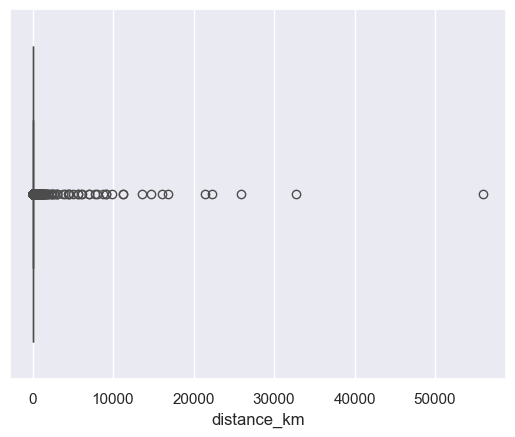

nominal_price_rub_amt:

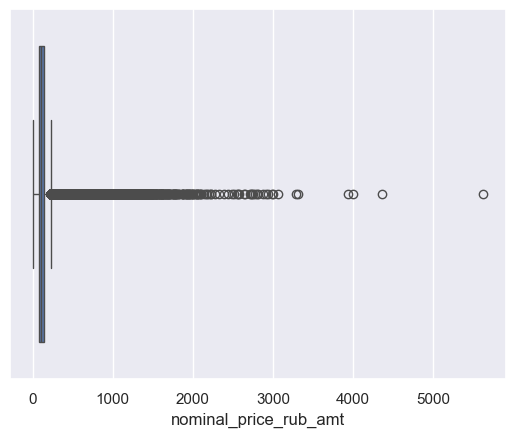

In [15]:
columns_for_clean = ['distance_km', 'nominal_price_rub_amt']
for col in columns_for_clean:
    print(col, end=':')
    sns.boxplot(x = df[col])
    plt.show()

Обнаружены аномальные значения в колонках: `distance_km` (скорее всего из-за сбоя GPS), `nominal_price_rub_amt`.

При очистке важно учитывать редкие, но возможные реальные случаи, чтобы не удалить валидные наблюдения.

Для этого следует ограничить диапазон допустимых значений в соответствии с бизнес-логикой.

distance_km
Распределения:
- среднее: 2.5935617653873386
- медиана: 1.8504900598289349


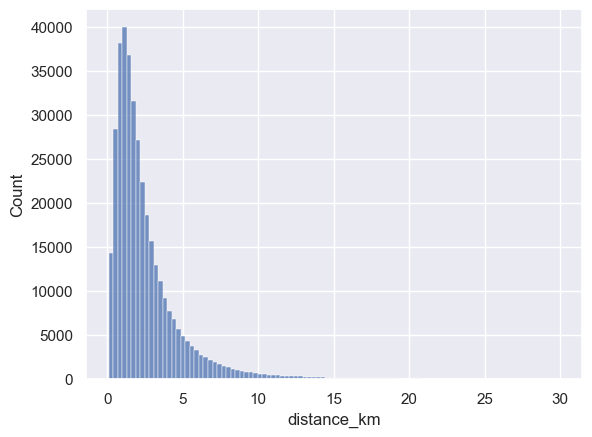

nominal_price_rub_amt
Распределения:
- среднее: 131.43659625630886
- медиана: 105.93


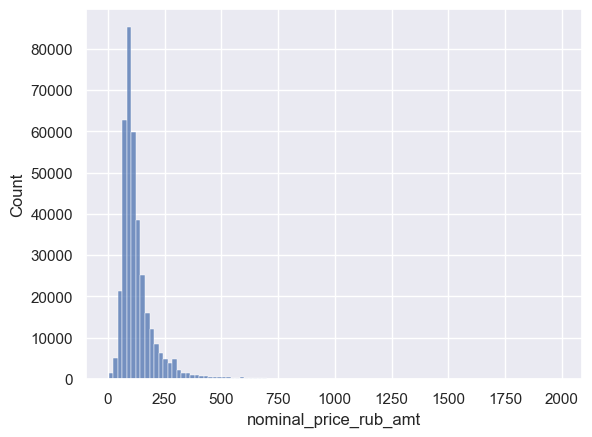

In [16]:
# Предположим, что состоявшаяся корректная поездка — поездка больше 100 метров и меньше 30 километров
# Реальной поездкой будем считать ту поездку, стоимость которой больше нуля и меньше 2000 рублей
df = df[(df['distance_km'] > 0.1) & (df['distance_km'] < 30) &
    (df['nominal_price_rub_amt'] > 0) & (df['nominal_price_rub_amt'] < 2000)]

columns_after_clean = ['distance_km', 'nominal_price_rub_amt']
for col in columns_after_clean:
    print(f"{col}\nРаспределения:\n- среднее: {df[col].mean()}\n- медиана: {df[col].median()}")
    sns.histplot(df[col], bins=100)
    plt.show()

In [17]:
df.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt
count,3.701160e+05,3.701160e+05,370116.000000,370116.000000,370116.000000,370116.000000,370116.000000,370116,370116,370116,370116.000000,370116,370116.000000,370116.000000
mean,2.893846e+08,5.967263e+08,31.542608,7.294218,42.668515,299.999406,2.593562,2024-08-19 00:07:06.438425088,2024-08-19 00:07:12.575507712,2024-08-19 00:19:03.754795520,3.526216,2024-08-19 00:38:46.953486592,131.436596,35.108717
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.100033,2024-04-09 12:23:51,2024-04-09 12:23:56.253700,2024-04-09 12:25:18.952234,0.000000,2024-04-09 12:23:56.253700,4.990000,-161.940000
25%,2.618157e+08,2.943334e+08,24.000000,6.490000,30.000000,300.000000,1.084028,2024-07-22 10:18:32,2024-07-22 10:18:36.724357376,2024-07-22 10:33:46.137125120,3.000000,2024-07-22 11:05:44.371917824,84.900000,10.390000
50%,2.704375e+08,6.105246e+08,31.000000,7.490000,50.000000,300.000000,1.850490,2024-08-23 13:51:15,2024-08-23 13:51:19.423956992,2024-08-23 14:03:05.892463360,3.000000,2024-08-23 14:38:48.464513024,105.930000,17.890000
75%,3.432689e+08,8.638580e+08,37.000000,8.220000,50.000000,300.000000,3.188371,2024-09-16 16:50:31.750000128,2024-09-16 16:50:36.559250176,2024-09-16 17:00:47.296203520,3.000000,2024-09-16 17:08:51.769499904,146.200000,33.730000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,300.000000,29.980122,2024-10-21 17:18:04,2024-10-21 17:18:07.715000,2024-10-21 17:23:06.640943,12.000000,2024-10-21 21:13:43.199000,1991.570000,2043.890000
std,3.820793e+07,3.307748e+08,9.409417,1.288262,11.970164,0.361621,2.559003,NaN,NaN,NaN,1.197055,NaN,92.029134,65.610775


Удалены нереальные значения, сохранены реальные редкие случаи.

---
## 6. Feature Engineering (Конструирование признаков)
---

In [18]:
 # Длительность поездки в минутах
df['trip_duration_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,trip_duration_min
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,2.119989,2024-04-09 12:23:51,2024-04-09 12:23:56.253700,2024-04-09 12:25:18.952234,3,2024-04-09 12:23:56.253700,64.98,0.0,1.378309
10,252636612,269139778,F,30,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,1.431410,2024-04-14 15:29:58,2024-04-14 15:30:03.160278,2024-04-14 15:32:27.711029,3,2024-04-14 15:30:03.160278,73.97,0.0,2.409179
12,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,0.805661,2024-04-17 16:45:16,2024-04-17 16:45:20.641980,2024-04-17 16:51:26.403392,3,2024-04-17 16:45:20.641980,97.94,0.0,6.096024
17,252633555,536529139,M,29,GRD,UNM,ВОРОНЕЖСКАЯ ОБЛ,5.99,30.0,300.0,Max,6.132119,2024-04-21 12:44:35,2024-04-21 12:44:40.721737,2024-04-21 12:55:59.666456,3,2024-04-21 12:44:40.721737,101.88,1.0,11.315745
20,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,SL,0.237861,2024-04-22 15:46:04,2024-04-22 15:46:10.062458,2024-04-22 15:55:04.011996,3,2024-04-22 15:46:10.062458,121.91,1.0,8.899159


In [19]:
# Средняя скорость в км/ч
df['avg_speed_kmh'] = df['distance_km'] / df['trip_duration_min'] * 60
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,trip_duration_min,avg_speed_kmh
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,...,2.119989,2024-04-09 12:23:51,2024-04-09 12:23:56.253700,2024-04-09 12:25:18.952234,3,2024-04-09 12:23:56.253700,64.98,0.0,1.378309,92.286525
10,252636612,269139778,F,30,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,1.431410,2024-04-14 15:29:58,2024-04-14 15:30:03.160278,2024-04-14 15:32:27.711029,3,2024-04-14 15:30:03.160278,73.97,0.0,2.409179,35.648903
12,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,0.805661,2024-04-17 16:45:16,2024-04-17 16:45:20.641980,2024-04-17 16:51:26.403392,3,2024-04-17 16:45:20.641980,97.94,0.0,6.096024,7.929701
17,252633555,536529139,M,29,GRD,UNM,ВОРОНЕЖСКАЯ ОБЛ,5.99,30.0,300.0,...,6.132119,2024-04-21 12:44:35,2024-04-21 12:44:40.721737,2024-04-21 12:55:59.666456,3,2024-04-21 12:44:40.721737,101.88,1.0,11.315745,32.514617
20,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,...,0.237861,2024-04-22 15:46:04,2024-04-22 15:46:10.062458,2024-04-22 15:55:04.011996,3,2024-04-22 15:46:10.062458,121.91,1.0,8.899159,1.603706


In [20]:
# Отношение выплаченного кэшбэка к стоимости поездки
df['cashback_rate'] = df['loyalty_accrual_rub_amt'] / df['nominal_price_rub_amt']
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,trip_duration_min,avg_speed_kmh,cashback_rate
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,...,2024-04-09 12:23:51,2024-04-09 12:23:56.253700,2024-04-09 12:25:18.952234,3,2024-04-09 12:23:56.253700,64.98,0.0,1.378309,92.286525,0.000000
10,252636612,269139778,F,30,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,2024-04-14 15:29:58,2024-04-14 15:30:03.160278,2024-04-14 15:32:27.711029,3,2024-04-14 15:30:03.160278,73.97,0.0,2.409179,35.648903,0.000000
12,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,2024-04-17 16:45:16,2024-04-17 16:45:20.641980,2024-04-17 16:51:26.403392,3,2024-04-17 16:45:20.641980,97.94,0.0,6.096024,7.929701,0.000000
17,252633555,536529139,M,29,GRD,UNM,ВОРОНЕЖСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-04-21 12:44:35,2024-04-21 12:44:40.721737,2024-04-21 12:55:59.666456,3,2024-04-21 12:44:40.721737,101.88,1.0,11.315745,32.514617,0.009815
20,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,...,2024-04-22 15:46:04,2024-04-22 15:46:10.062458,2024-04-22 15:55:04.011996,3,2024-04-22 15:46:10.062458,121.91,1.0,8.899159,1.603706,0.008203


In [21]:
# Час по локальному времени старта поездки
df['hour'] = df['local_book_start_dttm'].dt.hour
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,trip_duration_min,avg_speed_kmh,cashback_rate,hour
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,...,2024-04-09 12:23:56.253700,2024-04-09 12:25:18.952234,3,2024-04-09 12:23:56.253700,64.98,0.0,1.378309,92.286525,0.000000,12
10,252636612,269139778,F,30,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,2024-04-14 15:30:03.160278,2024-04-14 15:32:27.711029,3,2024-04-14 15:30:03.160278,73.97,0.0,2.409179,35.648903,0.000000,15
12,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,2024-04-17 16:45:20.641980,2024-04-17 16:51:26.403392,3,2024-04-17 16:45:20.641980,97.94,0.0,6.096024,7.929701,0.000000,16
17,252633555,536529139,M,29,GRD,UNM,ВОРОНЕЖСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-04-21 12:44:40.721737,2024-04-21 12:55:59.666456,3,2024-04-21 12:44:40.721737,101.88,1.0,11.315745,32.514617,0.009815,12
20,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,...,2024-04-22 15:46:10.062458,2024-04-22 15:55:04.011996,3,2024-04-22 15:46:10.062458,121.91,1.0,8.899159,1.603706,0.008203,15


In [22]:
# День недели (где 0 - понедельник, 6 - воскресенье)
df['day_of_week'] = df['local_book_start_dttm'].dt.day_of_week
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,trip_duration_min,avg_speed_kmh,cashback_rate,hour,day_of_week
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,...,2024-04-09 12:25:18.952234,3,2024-04-09 12:23:56.253700,64.98,0.0,1.378309,92.286525,0.000000,12,1
10,252636612,269139778,F,30,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,2024-04-14 15:32:27.711029,3,2024-04-14 15:30:03.160278,73.97,0.0,2.409179,35.648903,0.000000,15,6
12,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,2024-04-17 16:51:26.403392,3,2024-04-17 16:45:20.641980,97.94,0.0,6.096024,7.929701,0.000000,16,2
17,252633555,536529139,M,29,GRD,UNM,ВОРОНЕЖСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-04-21 12:55:59.666456,3,2024-04-21 12:44:40.721737,101.88,1.0,11.315745,32.514617,0.009815,12,6
20,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,...,2024-04-22 15:55:04.011996,3,2024-04-22 15:46:10.062458,121.91,1.0,8.899159,1.603706,0.008203,15,0


In [23]:
# Месяц (где 1 - январь, 12 - декабрь)
df['month'] = df['local_book_start_dttm'].dt.month
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,trip_duration_min,avg_speed_kmh,cashback_rate,hour,day_of_week,month
1,252625610,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,...,3,2024-04-09 12:23:56.253700,64.98,0.0,1.378309,92.286525,0.000000,12,1,4
10,252636612,269139778,F,30,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,3,2024-04-14 15:30:03.160278,73.97,0.0,2.409179,35.648903,0.000000,15,6,4
12,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,3,2024-04-17 16:45:20.641980,97.94,0.0,6.096024,7.929701,0.000000,16,2,4
17,252633555,536529139,M,29,GRD,UNM,ВОРОНЕЖСКАЯ ОБЛ,5.99,30.0,300.0,...,3,2024-04-21 12:44:40.721737,101.88,1.0,11.315745,32.514617,0.009815,12,6,4
20,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,...,3,2024-04-22 15:46:10.062458,121.91,1.0,8.899159,1.603706,0.008203,15,0,4


Необходимо очистить данные на основе новых признаков. Для этого посмотрим на распределение этих новых количественных признаков:

trip_duration_min:

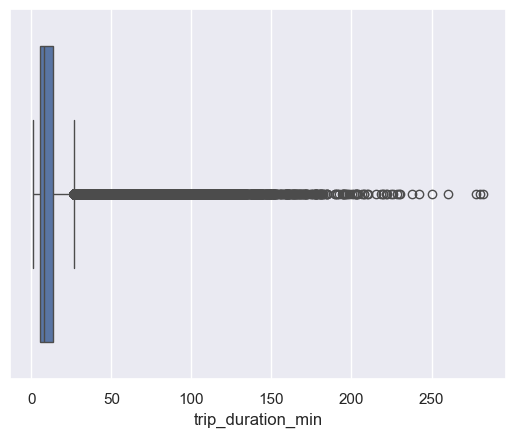

avg_speed_kmh:

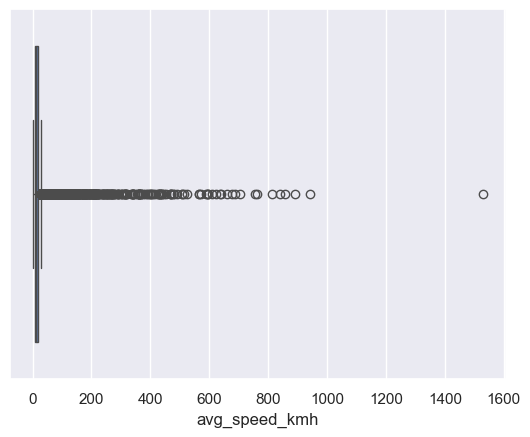

cashback_rate:

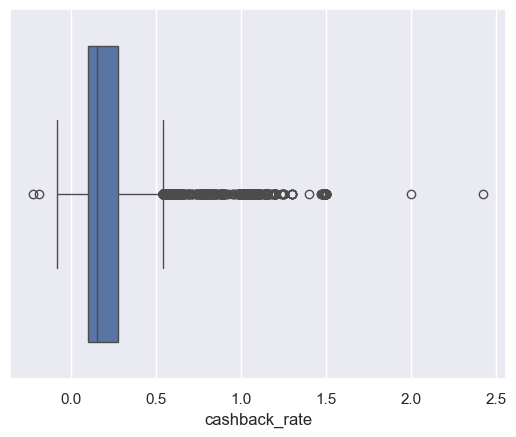

In [24]:
new_columns = ['trip_duration_min', 'avg_speed_kmh', 'cashback_rate']
for col in new_columns:
    print(col, end=':')
    sns.boxplot(x = df[col])
    plt.show()

В каждом из признаков замечены аномалии.

In [25]:
df = df[(df['avg_speed_kmh'] > 0) & (df['avg_speed_kmh'] < 30) &
    (df['trip_duration_min'] > 0) & (df['trip_duration_min'] < 120) &
    (df['cashback_rate'] >= 0) & (df['cashback_rate'] <= 1)]

df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,trip_duration_min,avg_speed_kmh,cashback_rate,hour,day_of_week,month
12,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,3,2024-04-17 16:45:20.641980,97.94,0.0,6.096024,7.929701,0.000000,16,2,4
20,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,...,3,2024-04-22 15:46:10.062458,121.91,1.0,8.899159,1.603706,0.008203,15,0,4
21,252621809,145875613,M,35,GRD,DIV,Г МОСКВА,7.99,50.0,300.0,...,3,2024-04-22 15:47:00.283797,129.90,1.0,9.472665,1.786802,0.007698,15,0,4
22,252632392,328153536,M,25,Unknown,Unknown,Г САНКТ-ПЕТЕРБУРГ,6.99,30.0,300.0,...,3,2024-04-23 06:53:45.475088,57.96,0.0,3.226266,5.638083,0.000000,6,1,4
23,252633271,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,...,3,2024-04-23 09:46:22.008459,87.45,0.0,4.267223,11.568776,0.000000,9,1,4


Почему именно так избавились от аномалий:
- Ограничили диапазон средней скорости до 30 км/ч, так как скорость выше 30 км/ч — это маловероятно для городских самокатов.
- Ограничили длительность поездки 2 часами, чтобы исключить ошибки отслеживания или незавершённые аренды.
- Ограничили кэшбэк 100%, чтобы сервис не был убыточным. Убрали отрицательные значения кэшбэка (`loyalty_accrual_rub_amt` — размер _выплаченного_ кэшбэка в рублях, а не списанного).

distance_km
Распределения:
- среднее: 2.4781479192907123
- медиана: 1.79888609590842


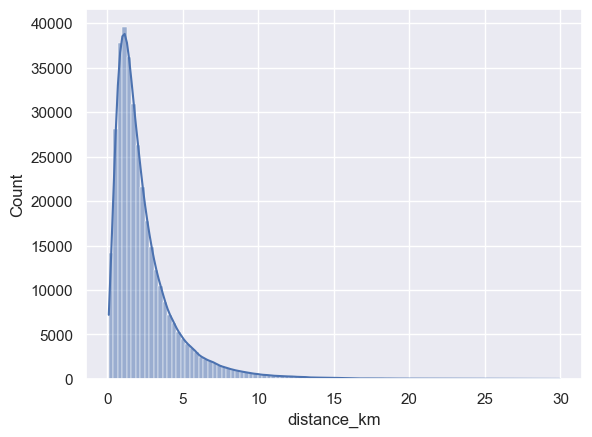

trip_duration_min
Распределения:
- среднее: 11.651519141535704
- медиана: 8.161185133333333


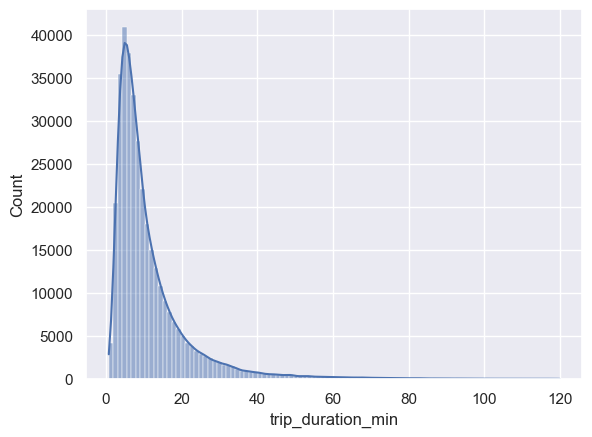

avg_speed_kmh
Распределения:
- среднее: 13.709885700175732
- медиана: 13.112352371347248


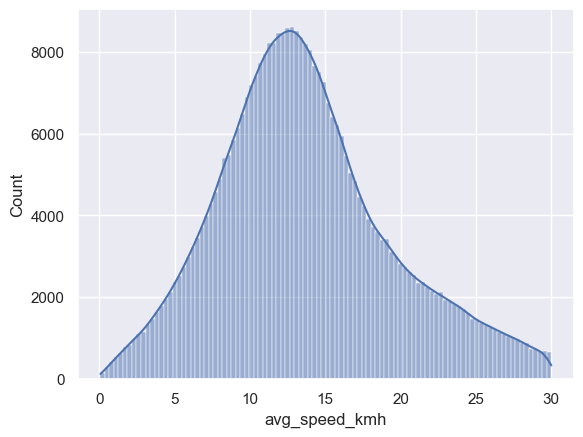

nominal_price_rub_amt
Распределения:
- среднее: 129.82257993403385
- медиана: 105.93


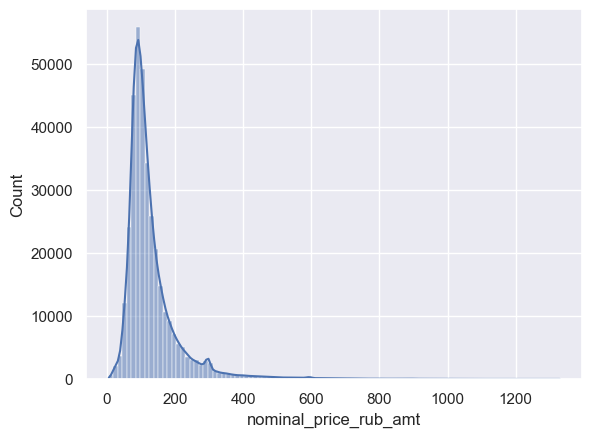

cashback_rate
Распределения:
- среднее: 0.2298536670839778
- медиана: 0.14998964159933706


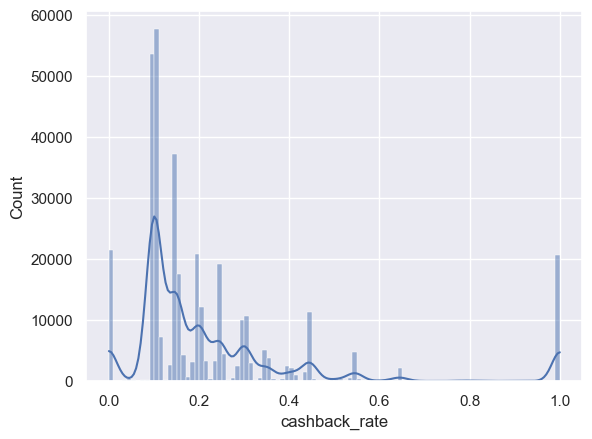

In [26]:
# Распределение очищенных данных

columns_after_clean = ['distance_km', 'trip_duration_min', 'avg_speed_kmh',
                       'nominal_price_rub_amt', 'cashback_rate']
for col in columns_after_clean:
    print(f"{col}\nРаспределения:\n- среднее: {df[col].mean()}\n- медиана: {df[col].median()}")
    sns.histplot(df[col], bins=100, kde=True)
    plt.show()

In [27]:
print(f"Размер очищенного датасета: {df.shape}")

Размер очищенного датасета: (355637, 25)


---
## 7. Сохранение очищенных данных
---

In [28]:
df.to_parquet('../data/cleaned/kicksharing_clean.parquet', index=False)
df.to_csv('../data/cleaned/kicksharing_clean.csv', index=False)

---
## 8. Результаты очистки
---

- Записей в исходном датасете: 396 749.
- Записей в датасете после очистки: 355 637.
- Изменилось количество колонок (с 20 до 25):
    1. Удалён признак `loyalty_accrual_bns_amt`.
    2. Добавлены новые признаки: `trip_duration_min`, `avg_speed_kmh`, `cashback_rate`, `hour`, `day_of_week`, `month`.
- Данные приведены к корректным типам:
    1. Даты — к datetime;
    2. Категории — к category.
- Данные полностью очищены и сохранены в `data/cleaned/kicksharing_clean.csv`. Готовы к исследовательскому анализу (EDA).